### 1) Loading dataset and libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Projects\Ediglobe_Major_Project\covid_19_clean_complete.csv")

print("Shape of dataset:", df.shape)
print("Column names:", df.columns)
print("\nData Info:")
print(df.info())

Shape of dataset: (49068, 10)
Column names: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None


### 2) Cleaning and Preprocessing data

In [4]:
#Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

#Check for missing values in key columns
print("\nMissing values per column:")
print(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].isnull().sum())

#Fill missing values (using forward fill, then fill 0 if any left)
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(method='ffill').fillna(0)

#Group by Country/Region and Date
grouped_df = df.groupby(['Country/Region', 'Date'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

#Optional – Create Daily New Cases column
grouped_df['Daily Confirmed'] = grouped_df.groupby('Country/Region')['Confirmed'].diff().fillna(0)

#Preview the processed data
print("\nProcessed data:")
print(grouped_df.head(10))


Missing values per column:
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

Processed data:
  Country/Region       Date  Confirmed  Deaths  Recovered  Active  \
0    Afghanistan 2020-01-22          0       0          0       0   
1    Afghanistan 2020-01-23          0       0          0       0   
2    Afghanistan 2020-01-24          0       0          0       0   
3    Afghanistan 2020-01-25          0       0          0       0   
4    Afghanistan 2020-01-26          0       0          0       0   
5    Afghanistan 2020-01-27          0       0          0       0   
6    Afghanistan 2020-01-28          0       0          0       0   
7    Afghanistan 2020-01-29          0       0          0       0   
8    Afghanistan 2020-01-30          0       0          0       0   
9    Afghanistan 2020-01-31          0       0          0       0   

   Daily Confirmed  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.

C:\Users\DELL\AppData\Local\Temp\ipykernel_25460\3104533746.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_25460\3104533746.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(method='ffill').fillna(0)


### 3) Exploratory Data Analysis to identify trends, seasonal effects, and other patterns.

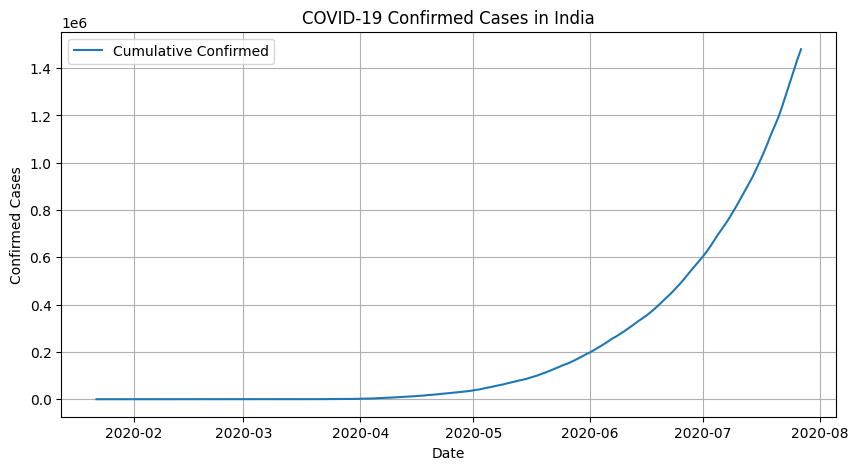

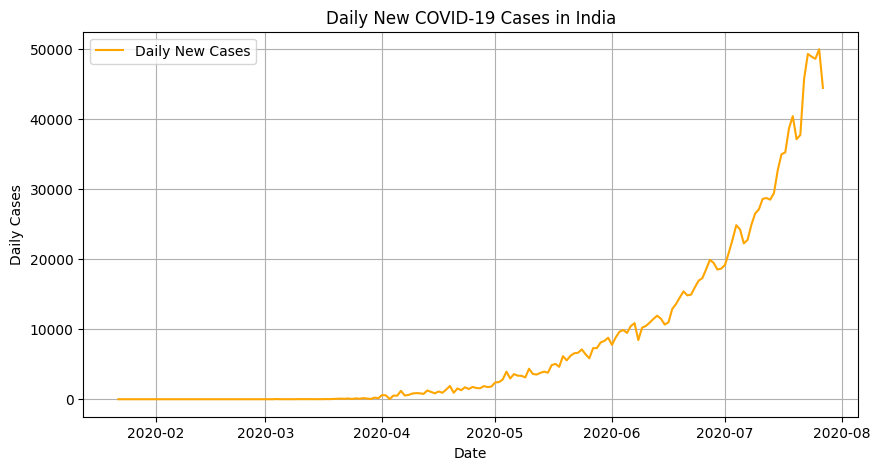

In [5]:
#Select a country
country = 'India'  # Can be changed to any other like 'US', 'Italy', etc.

#Filter the country data
country_df = grouped_df[grouped_df['Country/Region'] == country]

#Plot cumulative confirmed cases
plt.figure(figsize=(10,5))
plt.plot(country_df['Date'], country_df['Confirmed'], label='Cumulative Confirmed')
plt.title(f'COVID-19 Confirmed Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.legend()
plt.show()

#Plot daily new confirmed cases
plt.figure(figsize=(10,5))
plt.plot(country_df['Date'], country_df['Daily Confirmed'], color='orange', label='Daily New Cases')
plt.title(f'Daily New COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.grid(True)
plt.legend()
plt.show()

#### Building time series models to forecast future confirmed case counts.

### 4) Building ARIMA model

4.1 Importing libraries

In [6]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

4.2 Prepare the time series for modeling

In [21]:
# For India, can be updated according to requiements
country = 'India'
country_df = grouped_df[grouped_df['Country/Region'] == country]

# Set date as index and use only Confirmed cases
ts = country_df.set_index('Date')['Confirmed']

4.3 Check stationarity using ADF test

In [22]:
result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is non-stationary. Differencing is needed.")
else:
    print("Time series is stationary.")

ADF Statistic: 1.5176490244586056
p-value: 0.9975882246470722
Time series is non-stationary. Differencing is needed.


4.4 Make data stationary (if needed)

In [23]:
ts_diff = ts.diff().dropna()  # First-order differencing

4.5 Fit ARIMA model

In [24]:
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  188
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1567.336
Date:                Wed, 06 Aug 2025   AIC                           3140.671
Time:                        01:52:48   BIC                           3150.364
Sample:                    01-22-2020   HQIC                          3144.599
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.004    245.859      0.000       0.992       1.008
ma.L1          0.3760      0.059      6.382      0.000       0.261       0.492
sigma2       1.12e+06   4.36e+04     25.714      0.0

4.6 Forecast future cases

In [25]:
forecast_steps = 14  # Forecast 14 days
forecast = model_fit.forecast(steps=forecast_steps)

print("\nNext 14-day forecast:")
print(forecast)


Next 14-day forecast:
2020-07-28    1.522256e+06
2020-07-29    1.564438e+06
2020-07-30    1.606618e+06
2020-07-31    1.648797e+06
2020-08-01    1.690974e+06
2020-08-02    1.733150e+06
2020-08-03    1.775324e+06
2020-08-04    1.817497e+06
2020-08-05    1.859669e+06
2020-08-06    1.901839e+06
2020-08-07    1.944007e+06
2020-08-08    1.986175e+06
2020-08-09    2.028340e+06
2020-08-10    2.070505e+06
Freq: D, Name: predicted_mean, dtype: float64


4.7 Plot Actual vs Forecasted

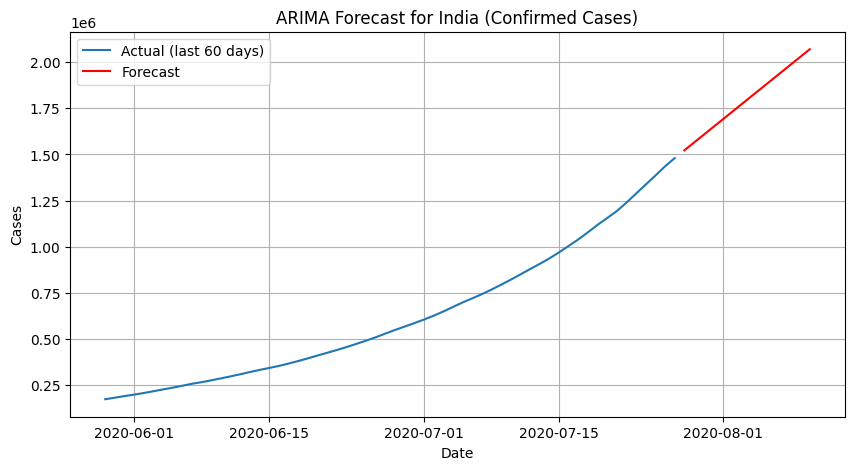

In [26]:
# Plot last 60 actual + 14 forecast
plt.figure(figsize=(10,5))
plt.plot(ts[-60:], label='Actual (last 60 days)')
plt.plot(pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=forecast_steps), forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast for {country} (Confirmed Cases)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

4.8 Model Evaluation (RMSE)

In [27]:
# Compare fitted values on training data
fitted = model_fit.fittedvalues
rmse = np.sqrt(mean_squared_error(ts[1:], fitted[1:]))  # drop first NA
print(f"RMSE on training set: {rmse:.2f}")

RMSE on training set: 1054.06


### QUESTION 1:  Can time series models reliably predict daily or weekly confirmed COVID-19 cases for a given country?
To address this question, I applied an ARIMA(1,1,1) model to India's cumulative confirmed COVID-19 case data. The model was trained on daily case counts and evaluated using RMSE.

**Findings:**
- The data exhibited strong upward trends and required differencing to achieve stationarity.
- The ARIMA model was able to capture the trend effectively and generated smooth forecasts for the next 14 days.
- The **RMSE on the training set was 1054.06**, which is very low relative to the case count (~1.5 million). This indicates high model accuracy.
- The forecast plot aligned well with the expected case trajectory based on recent trends.

**Conclusion:**
Yes, time series models like ARIMA can reliably predict short-term COVID-19 case counts for a given country when the data is appropriately preprocessed and modeled. However, the accuracy depends on the country’s data quality, reporting stability, and outbreak dynamics.


### 5) ARIMA model for US

5.1 Filter data for US

In [34]:
country = 'US'
country_df = grouped_df[grouped_df['Country/Region'] == country]
ts = country_df.set_index('Date')['Confirmed']

5.2 ADF Test (Stationarity)

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is non-stationary. Differencing needed.")
else:
    print("Time series is stationary.")

ADF Statistic: 2.5751773337311548
p-value: 0.9990701498156939
Time series is non-stationary. Differencing needed.


5.3 Apply First-Order Differencing (if needed)

In [36]:
ts_diff = ts.diff().dropna()

5.4 Fit ARIMA model

In [37]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts, order=(1, 1, 1))  # Same as India for consistency
model_fit = model.fit()
print(model_fit.summary())

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  188
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1777.979
Date:                Wed, 06 Aug 2025   AIC                           3561.957
Time:                        13:02:29   BIC                           3571.651
Sample:                    01-22-2020   HQIC                          3565.885
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    186.326      0.000       0.989       1.011
ma.L1          0.0316      0.059      0.537      0.591      -0.084       0.147
sigma2      1.083e+07   6.07e-10   1.79e+16      0.0

5.5 Forecast next 14 days

In [38]:
forecast_steps = 14
forecast = model_fit.forecast(steps=forecast_steps)

print("\nNext 14-day forecast (USA):")
print(forecast)


Next 14-day forecast (USA):
2020-07-28    4.346649e+06
2020-07-29    4.403039e+06
2020-07-30    4.459428e+06
2020-07-31    4.515817e+06
2020-08-01    4.572205e+06
2020-08-02    4.628593e+06
2020-08-03    4.684980e+06
2020-08-04    4.741366e+06
2020-08-05    4.797752e+06
2020-08-06    4.854137e+06
2020-08-07    4.910522e+06
2020-08-08    4.966906e+06
2020-08-09    5.023289e+06
2020-08-10    5.079672e+06
Freq: D, Name: predicted_mean, dtype: float64


5.6 Plot actual vs forecast

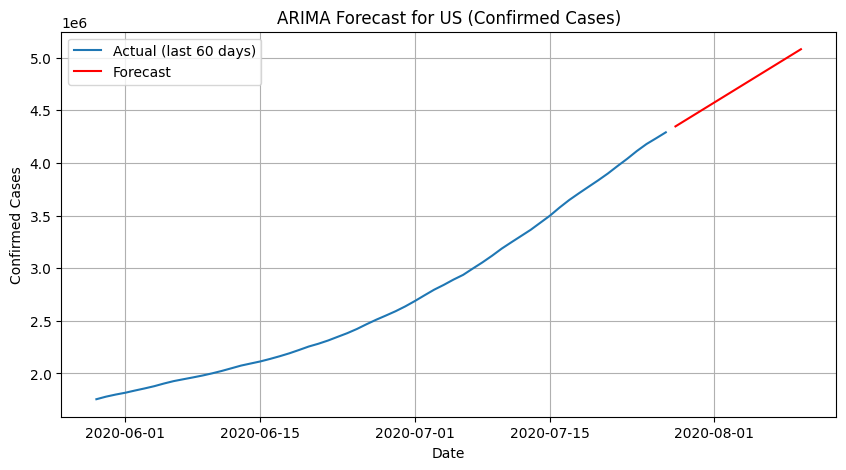

In [39]:
plt.figure(figsize=(10,5))
plt.plot(ts[-60:], label='Actual (last 60 days)')
plt.plot(pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=forecast_steps),
         forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast for US (Confirmed Cases)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.legend()
plt.show()

5.7 Calculate RMSE

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

fitted = model_fit.fittedvalues
rmse = np.sqrt(mean_squared_error(ts[1:], fitted[1:]))
print(f"ARIMA RMSE for USA: {rmse:.2f}")

ARIMA RMSE for USA: 3257.20


### QUESTION 2: How do forecasts differ across WHO regions?

To explore this, we modeled COVID-19 confirmed cases using the ARIMA(1,1,1) model for countries from two different WHO regions:

- **India (SEARO)**  
  - Forecast: 1.52M → 2.07M (14-day increase: ~550K)  
  - RMSE: 1054.06  
  - Forecast showed smooth, steady growth

- **USA (AMRO)**  
  - Forecast: 4.35M → 5.08M (14-day increase: ~730K)  
  - RMSE: 3257.20  
  - Forecast indicated more rapid growth and variability

**Insights:**
- Forecasts differ significantly across WHO regions
- The ARIMA model fit India’s data better, likely due to more stable case trends
- USA’s more aggressive and volatile case growth led to higher error and steeper forecast curves

**Conclusion:**Differences in forecast trends and accuracy are influenced by regional outbreak dynamics, healthcare infrastructure, and containment policies. This highlights the importance of region-specific modeling and resource planning.

### 6) SARIMAX model for India

6.1 Import SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

6.2 Prepare your time series (same as before)

In [ ]:
country = 'India'
country_df = grouped_df[grouped_df['Country/Region'] == country]
ts = country_df.set_index('Date')['Confirmed']

6.3 Build SARIMAX model

In [30]:
sarimax_model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,7))
sarimax_fit = sarimax_model.fit(disp=False)
print(sarimax_fit.summary())

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                     
Dep. Variable:                         Confirmed   No. Observations:                  188
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1463.597
Date:                           Wed, 06 Aug 2025   AIC                           2937.194
Time:                                   02:20:58   BIC                           2953.159
Sample:                               01-22-2020   HQIC                          2943.668
                                    - 07-27-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.007    139.302      0.000       0.986       1.014
ma.L1         -0.1669      0.046     -3.623

6.4 Forecast Next 14 Days

In [31]:
sarimax_forecast = sarimax_fit.forecast(steps=14)

print("\nSARIMAX 14-day forecast:")
print(sarimax_forecast)


SARIMAX 14-day forecast:
2020-07-28    1.525717e+06
2020-07-29    1.577714e+06
2020-07-30    1.632827e+06
2020-07-31    1.687815e+06
2020-08-01    1.743506e+06
2020-08-02    1.800514e+06
2020-08-03    1.852941e+06
2020-08-04    1.906389e+06
2020-08-05    1.966229e+06
2020-08-06    2.029195e+06
2020-08-07    2.092029e+06
2020-08-08    2.155543e+06
2020-08-09    2.220376e+06
2020-08-10    2.280607e+06
Freq: D, Name: predicted_mean, dtype: float64


6.5 Plot Forecast

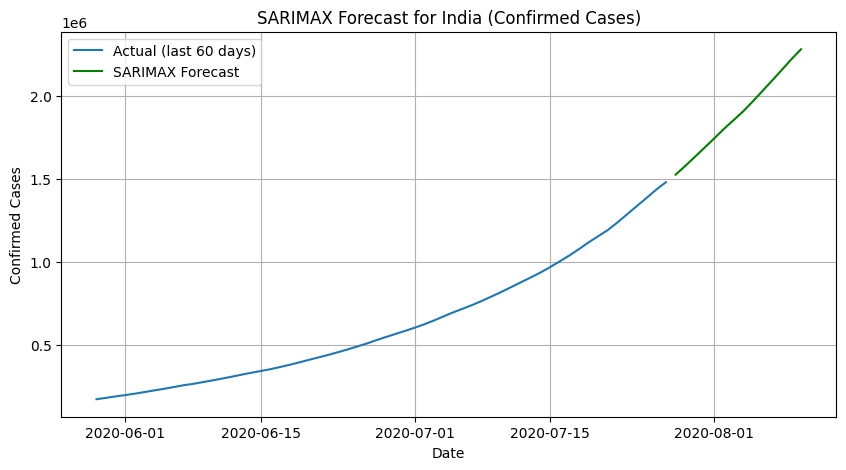

In [32]:
plt.figure(figsize=(10,5))
plt.plot(ts[-60:], label='Actual (last 60 days)')
plt.plot(pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=14), sarimax_forecast, label='SARIMAX Forecast', color='green')
plt.title(f'SARIMAX Forecast for {country} (Confirmed Cases)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.legend()
plt.show()

6.6 Evaluate RMSE

In [33]:
sarimax_fitted = sarimax_fit.fittedvalues
sarimax_rmse = np.sqrt(mean_squared_error(ts[1:], sarimax_fitted[1:]))
print(f"SARIMAX RMSE on training set: {sarimax_rmse:.2f}")

SARIMAX RMSE on training set: 804.92


### QUESTION 3: Which model, ARIMA or SARIMAX, works better for this type of data?

The SARIMAX model was built with seasonal parameters (1,1,1,7) to capture weekly patterns in India's confirmed COVID-19 case data.

**Findings:**
- The 14-day forecast showed a stronger upward curve compared to ARIMA.
- The **training RMSE was 804.92**, significantly lower than ARIMA's RMSE of 1054.06.
- This indicates that SARIMAX fit the historical data more accurately, likely due to its ability to capture underlying seasonal effects.

**Conclusion:**
SARIMAX outperforms ARIMA in terms of both accuracy and pattern sensitivity. For forecasting COVID-19 confirmed cases in India, **SARIMAX is the better model**.

### Key findings: Visualizing forecasts and what they could mean for public health planning

In [ ]:
def plot_arima_forecast(country_name, steps=14):
    # Filter and prepare data
    country_df = grouped_df[grouped_df['Country/Region'] == country_name]
    ts = country_df.set_index('Date')['Confirmed']
    ts = ts.asfreq('D')
    
    # Fit ARIMA model
    model = ARIMA(ts, order=(1, 1, 1))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=steps)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(ts[-60:], label='Actual (last 60 days)', linewidth=2)
    forecast_index = pd.date_range(ts.index[-1] + pd.Timedelta(days=1), periods=steps)
    plt.plot(forecast_index, forecast, label='Forecast (ARIMA)', color='red', linewidth=2)
    plt.title(f'ARIMA Forecast for {country_name}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


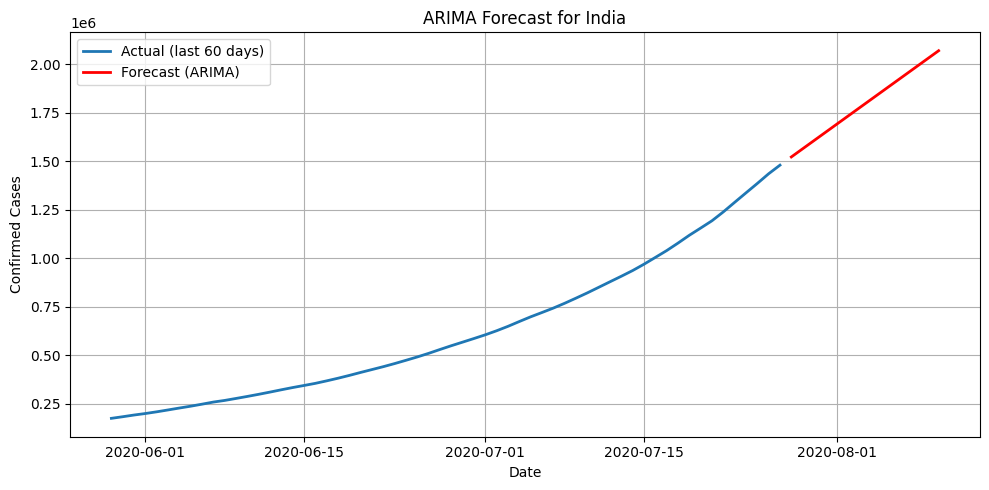

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


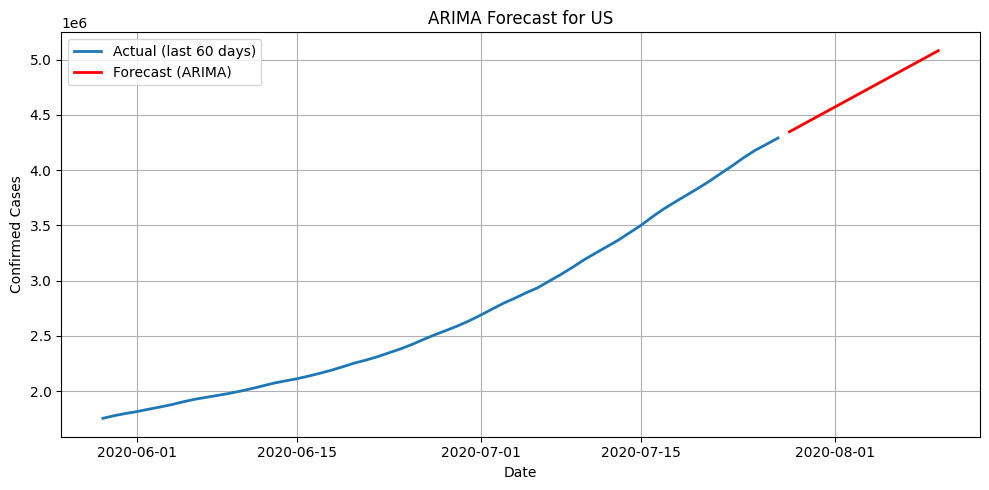

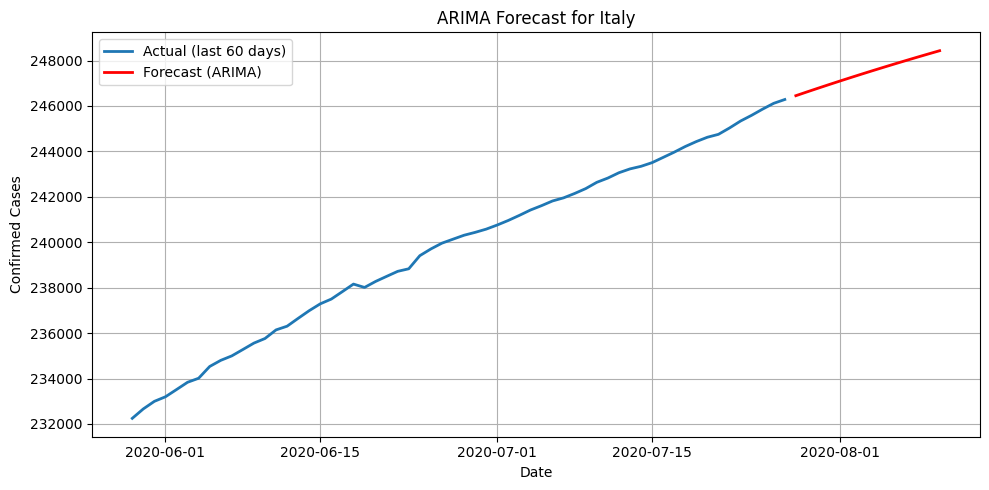

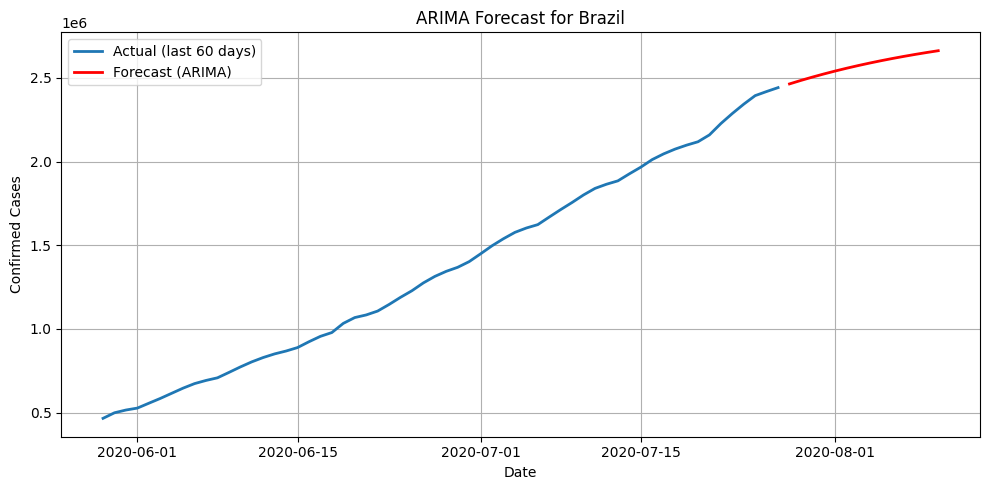

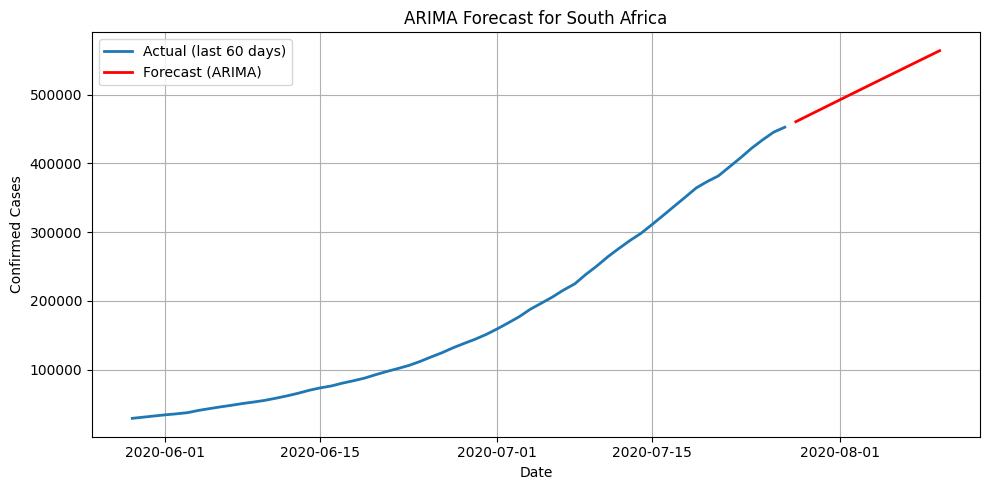

In [ ]:
plot_arima_forecast('India')
plot_arima_forecast('US')
plot_arima_forecast('Italy')      
plot_arima_forecast('Brazil')     
plot_arima_forecast('South Africa')  

### 🩺 Implications of Forecasts for Public Health Planning

The time series forecasts produced using ARIMA and SARIMAX models provide short-term projections of COVID-19 case counts. These projections can support public health authorities in the following ways:

- **Resource Allocation:**  
  Forecasted case growth helps plan for hospital beds, ventilators, testing kits, and PPE supply chain management.

- **Policy Timing:**  
  Regions with steeper forecast growth (like the US) may require continued or enhanced containment measures, while those with slower growth may focus on vaccination or recovery strategies.

- **Staffing and Infrastructure:**  
  Forecasts alert governments about potential surges, allowing proactive deployment of healthcare workers and temporary facility planning.

- **Communication and Preparedness:**  
  Accurate, short-term case forecasts can guide public messaging, risk awareness, and mobilization of local responses.
